<center> <H1> Assignment 1 - Natural Language Processing and Social Media Analytics </H1> </center>

<h3> <center> Group:D </center> </h3>
<h4> <center> Group Members: </center></h4>
Bharat Dhungana (C0916253), Keshav Gautam (C0919124), Satish Kandel (C0916210), 
Devi Samyuktha Chitturi (C0901961), Aishwarya Karki (C0903073)


In [174]:
# importing necessary liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [175]:
# load data
train_data=pd.read_csv('twitter_training.csv')
test_data=pd.read_csv('twitter_validation.csv')

In [176]:
# Get the size of the training data
train_data.size

298724

In [177]:
# Display the first 5 rows of the training dataset
train_data.head()

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...

In [178]:
# assign name to each of the column for dataframe
train_data.columns=['Id','subject','target','text']

In [179]:
train_data.head()

Id      subject    target  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

<h2><center> EXPLORATORY DATA ANALYSIS(EDA) </center></h2>

In [180]:
# exploring each of the columns and its value
train_data.subject.nunique()

32

In [181]:
train_data.target.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [182]:
train_data.target.value_counts()

target
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [183]:
# checking for any duplicates
train_data.duplicated().sum()

2700

In [184]:
# Remove duplicate rows from the dataset
train_data.drop_duplicates(inplace=True)

<h2><center> DATA VISUALIZATION </center></h2>

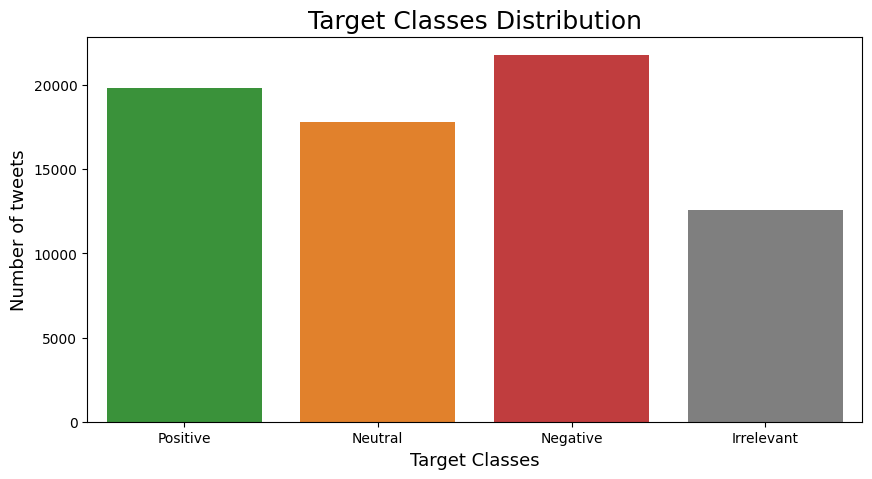

In [185]:
colors = ['#2ca02c', '#ff7f0e', '#d62728', '#7f7f7f'] 

plt.figure(figsize=(10,5))
sns.countplot(x=train_data.target, palette=colors)
plt.xlabel('Target Classes', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.title('Target Classes Distribution', fontsize=18)
plt.show()

In [186]:
# counts unique values in the subject column
train_data.subject.value_counts()

subject
TomClancysRainbowSix                 2344
Verizon                              2328
MaddenNFL                            2324
CallOfDuty                           2322
Microsoft                            2319
NBA2K                                2306
WorldOfCraft                         2304
LeagueOfLegends                      2303
TomClancysGhostRecon                 2301
Facebook                             2293
ApexLegends                          2289
Battlefield                          2267
Amazon                               2264
CallOfDutyBlackopsColdWar            2261
johnson&johnson                      2261
FIFA                                 2245
Dota2                                2229
Overwatch                            2229
Hearthstone                          2227
HomeDepot                            2226
Xbox(Xseries)                        2222
GrandTheftAuto(GTA)                  2214
Nvidia                               2211
Google                    

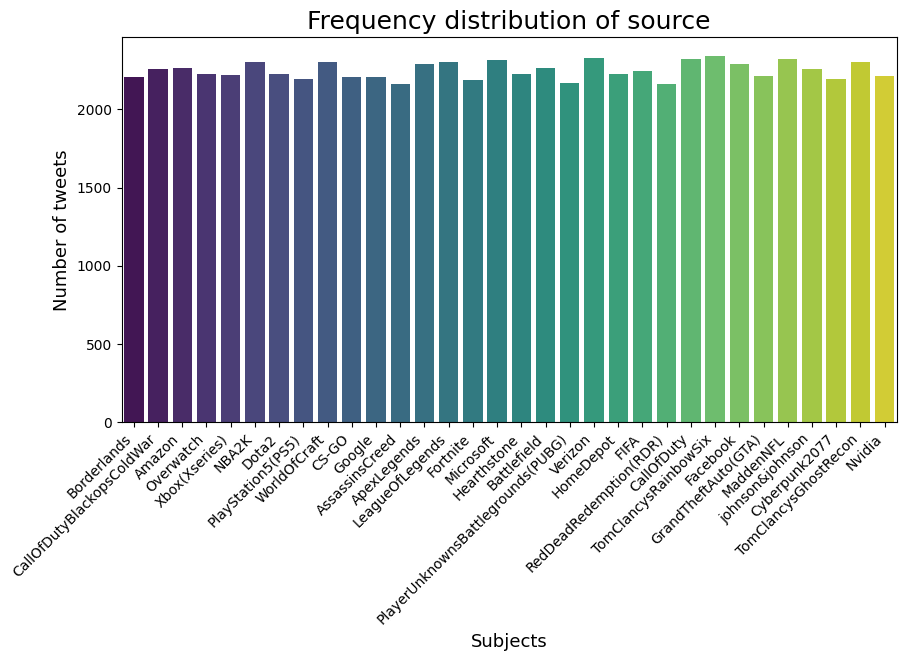

In [187]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_data.subject, palette='viridis')
plt.xlabel('Subjects', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.title('Frequency distribution of source', fontsize=18)
plt.xticks(rotation=45, ha='right')

plt.show()

Text(0.5, 1.0, 'Proportions of Target Sentiments')

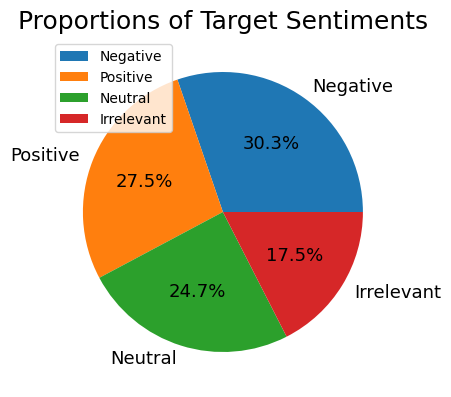

In [188]:
plt.figure(figsize = (10 , 10))

counts = train_data["target"].value_counts()
labels = ["Negative" , "Positive" , "Neutral" , "Irrelevant"]
plt.subplot(2,1,1)
plt.pie(counts , labels = labels , autopct = "%1.1f%%", textprops={'fontsize': 13})
plt.legend(loc='upper left')
plt.title("Proportions of Target Sentiments" , fontsize = 18 )

In [189]:
train_data.head()

Id      subject    target  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

In [190]:
# check for the null values
train_data.isnull().sum()

Id           0
subject      0
target       0
text       326
dtype: int64

In [191]:
# replacing null with s="unknown"
train_data["text"].fillna("unknown" , inplace = True)

In [192]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [193]:
# Import necessary libraries for text processing, tokenization, stopword removal, and word cloud generation
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import  WordNetLemmatizer

In [194]:
nltk.download("stopwords") #for the list of stop words
nltk.download("words") #for the list of valid english words
nltk.download("punkt") #pre-trained supervised model for spliting text into sentences and word
nltk.download('wordnet') #large english lexical database

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chitturidevisamyuktha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/chitturidevisamyuktha/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chitturidevisamyuktha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chitturidevisamyuktha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [195]:
from nltk.tokenize import word_tokenize

# Tokenize the input sentence into words
tokens = word_tokenize("Sentiment analysis is fun!")
tokens

['Sentiment', 'analysis', 'is', 'fun', '!']

In [196]:
# list of stop words in english
stop_words = set(stopwords.words('english'))

<h3> Example of text containing 'EMOJI' </h3>

In [197]:
text = u'This dog \U0001f602'
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

This dog 😂
This dog 


In [198]:
# function to remove emoji
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [199]:
def clean_text(text):
  '''
  parameter: text to be cleaned
  return: tokens after cleaning
  '''
  # list of stop words
  stop_words = set(stopwords.words('english'))

  lemmatizer = WordNetLemmatizer()

  # convert to lower case
  text = text.lower()

  # remove special words
  text = re.sub(r'[^\w\s]', '', text)  # Keep only words and spaces

  # remove numbers
  text = re.sub(r'\d+', '', text)

  # remove emoji
  text = remove_emojis(text)

  # Tokenize the text (split into words)
  tokens = word_tokenize(text)

  # Remove stopwords and stem the tokens
  # cleaned_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
  cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

  return cleaned_tokens

# Example usage
text = "Hello! This is an example sentence, with punctuation, numbers (123), and stopwords."
cleaned_text = clean_text(text)
print(cleaned_text)


['hello', 'example', 'sentence', 'punctuation', 'number', 'stopwords']


The clean_text function processes input text by converting it to lowercase, removing special characters, numbers, and emojis, and then 
tokenizing the text. It further cleans the tokens by removing stopwords and lemmatizing the remaining words, returning a list of cleaned 
tokens.

In [200]:
# apply above function to dataframe
train_data['tokenized_text'] = train_data['text'].apply(clean_text)

In [201]:
train_data.head(5)

Id      subject    target  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                      tokenized_text  
0             [coming, border, kill]  
1    [im, getting, borderland, kill]  
2   [im, coming, borderland, murder]  
3  [im, getting, borderland, murder]  
4  [im, getting, borderland, murder]

In [202]:
# Concatenate all tokenized texts into a single string
all_text = " ".join(train_data["tokenized_text"].astype(str))
all_text

"['coming', 'border', 'kill'] ['im', 'getting', 'borderland', 'kill'] ['im', 'coming', 'borderland', 'murder'] ['im', 'getting', 'borderland', 'murder'] ['im', 'getting', 'borderland', 'murder'] ['spent', 'hour', 'making', 'something', 'fun', 'dont', 'know', 'huge', 'borderland', 'fan', 'maya', 'one', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'pc', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'pictwittercommlsiwfjg'] ['spent', 'couple', 'hour', 'something', 'fun', 'dont', 'know', 'im', 'huge', 'borderland', 'fan', 'maya', 'one', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'pc', 'here', 'original', 'picture', 'compared', 'creation', 'made', 'fun', 'pictwittercom', 'mlsiwfjg'] ['spent', 'hour', 'something', 'fun', 'dont', 'know', 'im', 'huge', 'borderland', 'fan', 'maya', 'one', 'favorite', 'character'] ['spent', 'hour', 'making', 'something', 'fun', 'dont', 'know', 'huge', 'rhandlerr', 'fan', 'maya', 'one', 'favorite', 'character', 'decided', '

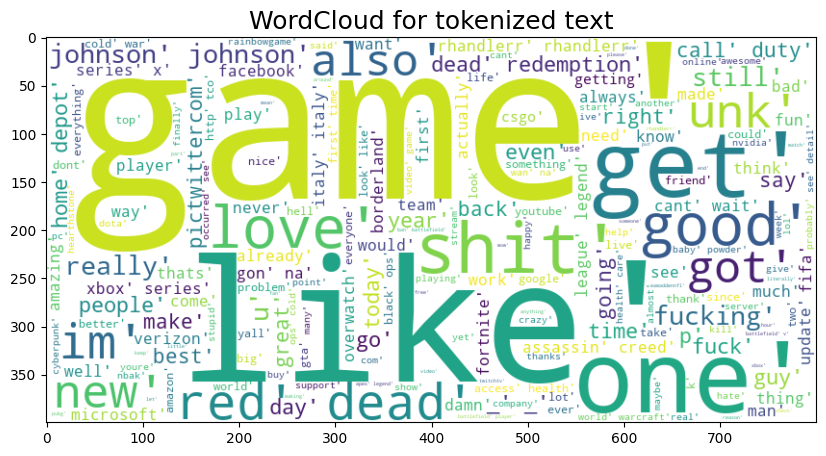

In [203]:
# Generate and display a word cloud from the tokenized text
wordcloud = WordCloud(height = 400 , width = 800 , background_color = "white").generate(all_text)
plt.figure(figsize = (10,5))
plt.title("WordCloud for tokenized text" , fontsize = 18 , c = "k")
plt.imshow(wordcloud , interpolation = "bilinear")
plt.show()

# Feature Extraction
The following two feature extraction techniques are used:
* Bag of Words (BoW): Convert the cleaned text data into a Bag of Words representation.
* TF-IDF (Term Frequency-Inverse Document Frequency): Apply the TF-IDF method to transform the text into numerical data.


In [204]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

<h3> Creating bag of word with CountVectorizer </h3>

Processes the text data by converting tokenized words into plain strings, creates a bag-of-words representation using CountVectorizer, 
and then retrieves the vocabulary and displays the resulting numerical representation of the text data. This prepares the text data for 
further analysis.

In [205]:
# convert tokenized text into plain string
train_data['cleaned_text'] = train_data['tokenized_text'].apply(lambda x: ' '.join(x))

# initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# fit and transform the cleaned_text
X = vectorizer.fit_transform(train_data['cleaned_text'])

# Convert the result to an array
bag_of_words_cv = X.toarray()

# Get the feature names (vocabulary)
vocabulary = vectorizer.get_feature_names_out()

print("Vocabulary:", vocabulary)
print("Bag of Words Representation:\n", bag_of_words_cv)


Vocabulary: ['aa' 'aaa' 'aaron' ... 'zonestreamcx' 'zoom' 'zuckerberg']
Bag of Words Representation:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [206]:
train_data.head()

Id      subject    target  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                      tokenized_text                  cleaned_text  
0             [coming, border, kill]            coming border kill  
1    [im, getting, borderland, kill]    im getting borderland kill  
2   [im, coming, borderland, murder]   im coming borderland murder  
3  [im, getting, borderland, murder]  im getting borderland murder  
4  [im, getting, borderland, murder]  im getting borderland murder

<h3> Creating bag of word with TfidfVectorizer </h3>

This initializes a TfidfVectorizer to convert a set of cleaned text documents into a numerical format, where important words are represented 
as features. It then retrieves the vocabulary used and prints both the vocabulary and the TF-IDF representation of the documents.

In [243]:
# initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# fit and transform the cleaned_text
X = vectorizer.fit_transform(train_data['cleaned_text'])

# Convert the result to an array
bag_of_words_tfid = X.toarray()

# Get the feature names (vocabulary)
vocabulary = vectorizer.get_feature_names_out()

print("Vocabulary:", vocabulary)
print("Bag of Words Representation:\n", bag_of_words_tfid)

Vocabulary: ['aa' 'aaa' 'aaron' ... 'zonestreamcx' 'zoom' 'zuckerberg']
Bag of Words Representation:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [208]:
bag_of_words_tfid.shape

(71981, 5000)

In [209]:
# sparse matrix
X

<71981x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 630290 stored elements in Compressed Sparse Row format>

In [210]:
x = bag_of_words_cv[:5000]
y = train_data.target[:5000]

<h3> Train-Test Split for features extracted with CountVectorizer </h3>

In [286]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(x,y, random_state=32, test_size=0.25)

In [212]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (3750, 5000)
X_test shape: (1250, 5000)
y_train shape: (3750,)
y_test shape: (1250,)


<h2><center> MODEL BUILDING </center></h2>

<h3>Naive Bayesian classifier</h3>

In [213]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [245]:
model_nb = MultinomialNB()

# Train a Multinomial Naive Bayes model on the training data
model_nb.fit(X_train,y_train)

MultinomialNB()

In [246]:
# make a prediction
y_pred = model_nb.predict(X_test)
y_pred

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Irrelevant',
       'Positive'], dtype='<U10')

In [247]:
model_nb.score(X_test,y_test)

0.7744

In [248]:
from sklearn.metrics import classification_report

# Generate and display the classification report for model evaluation
y_pred = model_nb.predict(X_test)
print(f"Report : \n{classification_report(y_test,y_pred)}")

Report : 
              precision    recall  f1-score   support

  Irrelevant       0.89      0.60      0.72       197
    Negative       0.87      0.75      0.81       285
     Neutral       0.83      0.67      0.74       310
    Positive       0.69      0.93      0.79       458

    accuracy                           0.77      1250
   macro avg       0.82      0.74      0.77      1250
weighted avg       0.80      0.77      0.77      1250



In [251]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate and display performance metrics for the Naive Bayes model
accuracy_nb_cv = accuracy_score(y_test, y_pred)
precision_nb_cv = precision_score(y_test, y_pred, average='weighted')
recall_nb_cv = recall_score(y_test, y_pred, average='weighted')
f1_nb_cv = f1_score(y_test, y_pred, average='weighted')

print("Performance matrix for Naive Bayesian Model:")
print(f"Accuracy: {accuracy_nb_cv}")
print(f"Precision: {precision_nb_cv}")
print(f"Recall: {recall_nb_cv}")
print(f"F1-Score: {f1_nb_cv}")

Performance matrix for Naive Bayesian Model:
Accuracy: 0.7744
Precision: 0.7975879389148312
Recall: 0.7744
F1-Score: 0.7717238980023119


<h4> Confusion matrix </h4>

In [219]:
from sklearn.metrics import confusion_matrix

In [252]:
# Compute and display the confusion matrix for the test predictions
confu_matrix = confusion_matrix(y_test,y_pred)
print(f"Confussion matrix : \n {confu_matrix}")

Confussion matrix : 
 [[118  10  10  59]
 [  8 215  14  48]
 [  2  12 209  87]
 [  4   9  19 426]]


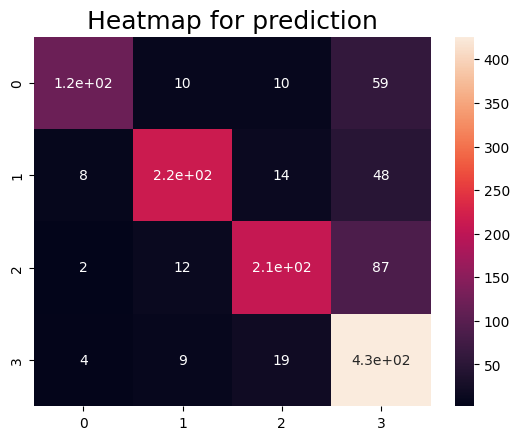

In [254]:
# visualizing the confusion matrix result
sns.heatmap(confu_matrix, annot=True)
plt.title("Heatmap for prediction",  fontsize=18)
plt.show()

<h3>SVM (Support Vector Machine)</h3>

In [272]:
# initialize the SVM
svm_classifier = SVC(kernel='linear')

# train the model
svm_classifier.fit(X_train, y_train)

# pridict
y_pred_svm = svm_classifier.predict(X_test)

In [223]:
# model evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Performance matrix for SVM Model:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")

Performance matrix for SVM Model:
Accuracy: 0.84
Precision: 0.8437659221862528
Recall: 0.84
F1-Score: 0.8398739069191115


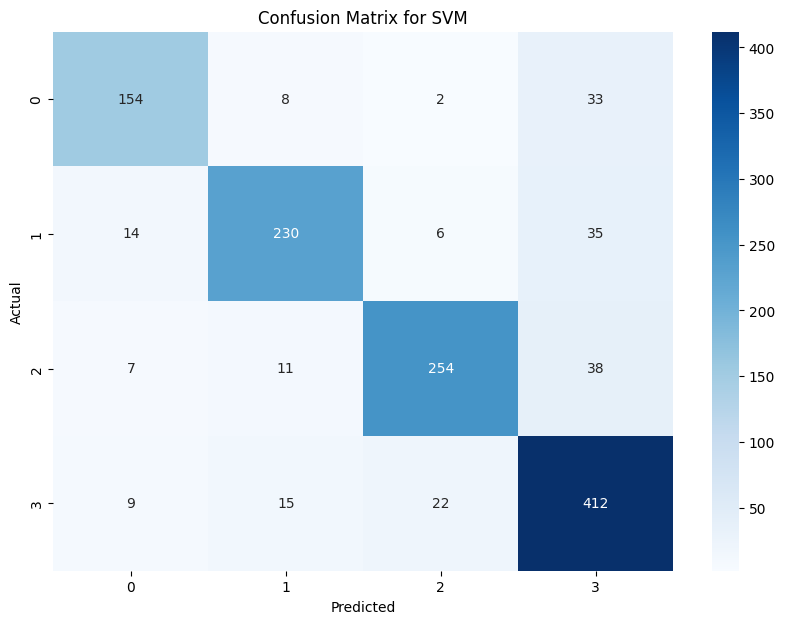

In [224]:
#confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

<h3> Build model using Naive Bayesian classifier Using feature extracted from Tf-Idf Vectorizer </h3>

In [255]:
# Select the first 5000 samples from the TF-IDF feature matrix and target labels
x = bag_of_words_tfid[:5000]
y = train_data.target[:5000]

In [226]:
X_train_tfid,X_test_tfid, y_train_tfid, y_test_tfid = train_test_split(x,y, random_state=32, test_size=0.25)

In [227]:
model_nb.fit(X_train_tfid,y_train_tfid)

MultinomialNB()

In [228]:
# make a prediction
y_pred_tfid = model_nb.predict(X_test_tfid)
y_pred_tfid

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Irrelevant',
       'Positive'], dtype='<U10')

In [257]:
# Calculate accuracy of the Naive Bayes model with TF-IDF features
accuracy_nb_tfid = accuracy_score(y_test_tfid, y_pred_tfid)
# Calculate weighted precision score
precision_nb_tfid = precision_score(y_test_tfid, y_pred_tfid, average='weighted')
# Calculate weighted recall score
recall_nb_tfid = recall_score(y_test_tfid, y_pred_tfid, average='weighted')
# Calculate weighted F1-score
f1_nb_tfid = f1_score(y_test_tfid, y_pred_tfid, average='weighted')

# performance metrics for the Naive Bayes model
print("Performance matrix for Naive Bayesian Model with features extracted with tfid:")
print(f"Accuracy: {accuracy_nb_tfid}")
print(f"Precision: {precision_nb_tfid}")
print(f"Recall: {recall_nb_tfid}")
print(f"F1-Score: {f1_nb_tfid}")

Performance matrix for Naive Bayesian Model with features extracted with tfid:
Accuracy: 0.7056
Precision: 0.795486046361202
Recall: 0.7056
F1-Score: 0.696887440090836


In [258]:
# Compute and display the confusion matrix for the test predictions
confu_matrix = confusion_matrix(y_test_tfid,y_pred_tfid)
print(f"Confussion matrix : \n {confu_matrix}")

Confussion matrix : 
 [[ 73   5  12 107]
 [  2 173   7 103]
 [  1   1 188 120]
 [  2   1   7 448]]


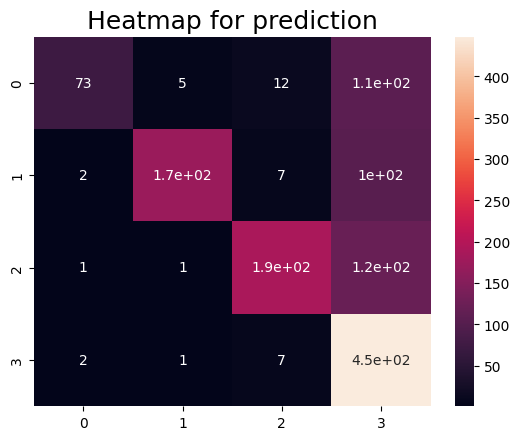

In [259]:
sns.heatmap(confu_matrix, annot=True)
plt.title("Heatmap for prediction",  fontsize=18)
plt.show()

# SVM

In [232]:
# train the model
svm_classifier.fit(X_train_tfid, y_train_tfid)
# pridict
y_pred_svm = svm_classifier.predict(X_test_tfid)

In [260]:
# model evaluation
accuracy_svm_tfid = accuracy_score(y_test_tfid, y_pred_svm)
precision_svm_tfid = precision_score(y_test_tfid, y_pred_svm, average='weighted')
recall_svm_tfid = recall_score(y_test_tfid, y_pred_svm, average='weighted')
f1_svm_tfid = f1_score(y_test_tfid, y_pred_svm, average='weighted')

print("Performance matrix for SVM Model:")
print(f"Accuracy: {accuracy_svm_tfid}")
print(f"Precision: {precision_svm_tfid}")
print(f"Recall: {recall_svm_tfid}")
print(f"F1-Score: {f1_svm_tfid}")

Performance matrix for SVM Model:
Accuracy: 0.8624
Precision: 0.8676629936195852
Recall: 0.8624
F1-Score: 0.8623138569152754


In [261]:
# Compute and display the confusion matrix for the test predictions
confu_matrix = confusion_matrix(y_test_tfid,y_pred_svm)
print(f"Confussion matrix : \n {confu_matrix}")

Confussion matrix : 
 [[166   7   3  21]
 [  8 237   9  31]
 [  5   6 250  49]
 [  9   9  15 425]]


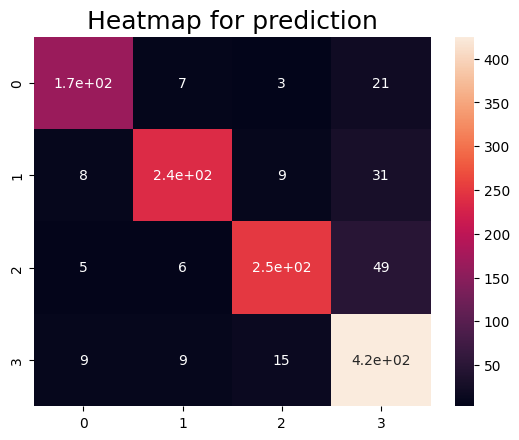

In [262]:
sns.heatmap(confu_matrix, annot=True)
plt.title("Heatmap for prediction",  fontsize=18)
plt.show()

<h3> Comparing the Results </h3>

In [236]:
# define the schema
schema = {
    'Model': ['Naive Bayesian(CountVectorizer)','Naive Bayesian(TfidfVectorizer)', 'SVM(CountVectorizer)', 'SVM(TfidfVectorizer)'],
    'Accuracy': [accuracy_nb_cv,accuracy_nb_tfid, accuracy_svm,accuracy_svm_tfid],
    'Precision': [precision_nb_cv,precision_nb_tfid, precision_svm,precision_svm_tfid],
    'Recall': [recall_nb_cv,recall_nb_tfid, recall_nb_tfid,recall_svm_tfid],
    'F1-Score': [f1_nb_cv,f1_nb_tfid, f1_svm_tfid,f1_svm_tfid]
}

# crete a dataframe
df = pd.DataFrame(schema)

df


Model  Accuracy  Precision  Recall  F1-Score
0  Naive Bayesian(CountVectorizer)    0.7744   0.797588  0.7744  0.771724
1  Naive Bayesian(TfidfVectorizer)    0.7056   0.795486  0.7056  0.696887
2             SVM(CountVectorizer)    0.8400   0.843766  0.7056  0.862314
3             SVM(TfidfVectorizer)    0.8624   0.867663  0.8624  0.862314

<h1> <center> Model Performance Comparison: </center> </h1>
Above table compares the performance of two models, each using a different combination of vectorization and classification techniques: 
Naive Bayesian with CountVectorizer and TF-IDF Vectorizer, and SVM with CountVectorizer and TF-IDF Vectorizer. The metrics include 
Accuracy, Precision, Recall, and F1-Score, providing insight into the effectiveness of each model.

*  Naive Bayesian (CountVectorizer):
Accuracy: 0.7744
Precision: 0.7976
Recall: 0.7744
F1-Score: 0.7717

This model shows decent performance, with balanced precision and recall. It achieves a relatively good accuracy of 77.44%, indicating 
that it performs well in many cases. However, the F1-score suggests that there may still be room for improvement, especially in 
increasing recall to better capture all relevant instances.

* Naive Bayesian (TF-IDF Vectorizer):
Accuracy: 0.7056
Precision: 0.7955
Recall: 0.7056
F1-Score: 0.6969

This model's accuracy drops to 70.56% when using TF-IDF instead of CountVectorizer. Although the precision remains high (0.7955), the 
recall is lower, leading to a reduced F1-score (0.6969). This suggests that while the model is confident in its predictions, it 
struggles to identify all relevant instances, possibly missing important cases.

* SVM (CountVectorizer):
Accuracy: 0.8400
Precision: 0.8438
Recall: 0.7056
F1-Score: 0.8623
The SVM model with CountVectorizer shows improved performance compared to both Naive Bayesian models, achieving an accuracy of 84.00%.
It has a high precision (0.8438) and an even higher F1-score (0.8623), indicating that it effectively balances precision and recall. However, the recall is notably lower than the other metrics, suggesting that it might miss some instances.

* SVM (TF-IDF Vectorizer):
Accuracy: 0.8624
Precision: 0.8677
Recall: 0.8624
F1-Score: 0.8623

The SVM model with TF-IDF Vectorizer performs the best overall, with the highest accuracy (86.24%) and balanced precision and recall. 
The precision (0.8677) and recall (0.8624) are both high, leading to an equally high F1-score (0.8623). This indicates that the model 
is not only confident but also effective at capturing relevant instances across classes, making it the most balanced and effective 
model among the four.


## Summary
* SVM with TF-IDF Vectorizer is the most effective, with the highest accuracy (86.24%) and balanced precision, recall, and F1-score.
Naive Bayesian vs. SVM: SVM models outperform Naive Bayesian models, particularly when paired with TF-IDF Vectorizer, showing that
SVM is better at handling the classification task.

* Models using TF-IDF Vectorizer generally perform better than those using CountVectorizer, suggesting that capturing the importance
of words (TF-IDF) improves classification performance.

This analysis indicates that using SVM with TF-IDF is the most effective approach for this classification problem, offering the best 
balance between precision, recall, and overall accuracy.

<h2> Testing:</h2>

In [315]:
# Define a function to predict sentiment on a single text input
def predict_sentiment_on_text(text, vectorizer, model):
    # Transform the input text using the fitted vectorizer
    text_transformed = vectorizer.transform([text])

    # Convert the sparse matrix to a dense format
    text_transformed_dense = text_transformed.toarray()  # or text_transformed.todense()

    # Predict sentiment using the trained model
    prediction = model.predict(text_transformed_dense)
    return prediction

In [316]:
test_data['text'][27]

'Best squad yet#pubg #pubgmobile #pubgkenya instagram.com/p/B-Obt_eAA4f/…'

In [317]:
# Test the SVM model on the first text entry in test_data
test_text = test_data['text'][24]  # Get the first text entry
predicted_sentiment = predict_sentiment_on_text(test_text, vectorizer, svm_classifier)

# Print the predicted sentiment
print(f"Predicted Sentiment for the first text: {predicted_sentiment[0]}")

Predicted Sentiment for the first text: Positive


In [318]:
test_data['text'][9]

'The professional dota 2 scene is fucking exploding and I completely welcome it.\n\nGet the garbage out.'

In [319]:
# Test the SVM model on the first text entry in test_data
test_text = test_data['text'][9]  # Get the first text entry
predicted_sentiment = predict_sentiment_on_text(test_text, vectorizer, svm_classifier)

# Print the predicted sentiment
print(f"Predicted Sentiment for the first text: {predicted_sentiment[0]}")

Predicted Sentiment for the first text: Negative


## Summary:

The testing process involved using a Support Vector Machine (SVM) model to predict the sentiment of specific text entries from the test_data dataset.

#### 1. Prediction for Test Entry 24:

Input Text: The text entry at index 24 was processed.

Predicted Sentiment: The model predicted the sentiment as Positive.

#### 2. Prediction for Test Entry 9:

Input Text: The text entry at index 9 was processed.

Predicted Sentiment: The model predicted the sentiment as Negative.

The SVM model successfully predicted the sentiment for the provided text entries, demonstrating its capability to classify sentiments based on the training data. The predictions indicate a distinction in sentiment, with one entry being classified as positive and the other as negative. This testing reinforces the effectiveness of the model in sentiment analysis tasks.